In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
DATA_PATH = r"C:\Users\salah\data_1.json"

In [9]:
def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """
    with open(data_path, "r") as fp:
        data = json.load(fp)
    X = np.array(data["features"])  # Charger les données à partir de la clé "features"
    y = np.array(data["labels"])
    # Print the shape of the loaded data
    print("Loaded data shape - X:", X.shape, "y:", y.shape)
    return X, y

In [10]:
# Charger les données MFCC
X, y = load_data(DATA_PATH)

Loaded data shape - X: (9000, 56) y: (9000,)


In [11]:
# Afficher les dimensions de X
print("Dimensions des données MFCC:", X.shape)

Dimensions des données MFCC: (9000, 56)


In [12]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """
    fig, axs = plt.subplots(2)
    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    plt.show()

In [13]:
def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation, and test sets.
    :param test_size (float): Value in [0, 1] indicating the percentage of data set to allocate to the test split
    :param validation_size (float): Value in [0, 1] indicating the percentage of the train set to allocate to the validation split
    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """
    # load data
    X, y = load_data(DATA_PATH)
    # calculate the size of the validation set
    validation_split = validation_size / (1 - test_size)
    # create train, validation, and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_split)
    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]
    return X_train, X_validation, X_test, y_train, y_validation, y_test

In [14]:
def build_model(input_shape):
    """Generates CNN model
    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """
    # build network topology
    model = keras.Sequential()
    # Add a reshaping layer to adapt the input shape
    model.add(keras.layers.Reshape((input_shape[0], input_shape[1], 1), input_shape=input_shape))
    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'))  # Ajout de 'padding=same'
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))  # Ajout de 'padding=same'
    model.add(keras.layers.BatchNormalization())
    # 2nd conv layer
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))  # Ajout de 'padding=same'
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))  # Ajout de 'padding=same'
    model.add(keras.layers.BatchNormalization())
    # 3rd conv layer
    model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))  # Ajout de 'padding=same'
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))  # Ajout de 'padding=same'
    model.add(keras.layers.BatchNormalization())
    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(0.5))  # Augmentation du taux de dropout
    # output layer
    model.add(keras.layers.Dense(9, activation='softmax'))
    return model

In [15]:
def predict(model, X, y):
    """Predict a single sample using the trained model
    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """
    # Assurez-vous que les données ont la forme attendue par le modèle
    X = X[..., np.newaxis]  # Ajoutez une nouvelle dimension si nécessaire
    # Effectuez la prédiction
    prediction = model.predict(X)
    # Obtenez l'indice avec la valeur maximale
    predicted_index = np.argmax(prediction, axis=1)
    print("Target: {}, Predicted label: {}".format(y, predicted_index))

Loaded data shape - X: (9000, 56) y: (9000,)
Loaded data shape - X: (9000, 56) y: (9000,)


C:\Users\salah\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 56, 1, 1)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 56, 1, 32)      │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 28, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 1, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 1, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 1, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 1, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 1, 128)     │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 1, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       114,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,545 (818.54 KB)

 Trainable params: 209,097 (816.79 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3661 - loss: 1.8945 - val_accuracy: 0.3950 - val_loss: 1.8401
Epoch 2/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6960 - loss: 0.9785 - val_accuracy: 0.6567 - val_loss: 1.3655
Epoch 3/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8260 - loss: 0.6180 - val_accuracy: 0.8133 - val_loss: 0.7641
Epoch 4/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8629 - loss: 0.4894 - val_accuracy: 0.9411 - val_loss: 0.3211
Epoch 5/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8892 - loss: 0.3974 - val_accuracy: 0.9461 - val_loss: 0.2234
Epoch 6/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9084 - loss: 0.3361 - val_accuracy: 0.9589 - val_loss: 0.1586
Epoch 7/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9244 - loss: 0.2588 - val_accuracy: 0.9717 - val_loss: 0.1260
Epoch 8/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9429 - loss: 0.2184 - val_accuracy: 0.

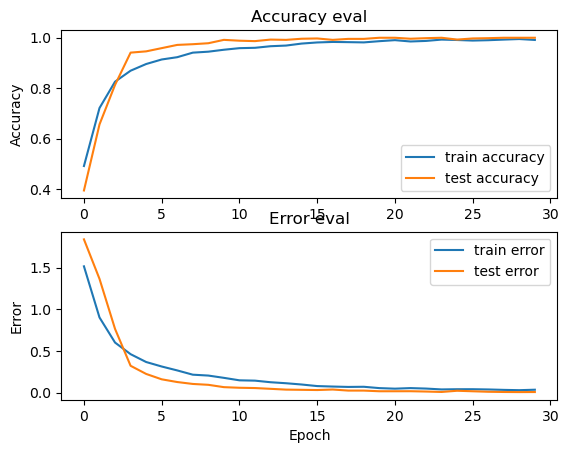

71/71 - 0s - 1ms/step - accuracy: 1.0000 - loss: 0.0064

Test accuracy: 1.0
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Target: [0 3 8 ... 7 1 1], Predicted label: [0 3 8 ... 7 1 1]
Dimensions des données MFCC: (9000, 56)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_1 (Reshape)             │ (None, 56, 1, 1)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 56, 1, 32)      │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 28, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 1, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 1, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 1, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 1, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 1, 128)     │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 1, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 896)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       114,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,545 (818.54 KB)

 Trainable params: 209,097 (816.79 KB)

 Non-trainable params: 448 (1.75 KB)

Dimensions attendues de l'entrée de la première couche convolutive: (56, 1, 1)
Dimensions des données MFCC: (56,)


In [16]:
if __name__ == "__main__":
    # Charger les données MFCC une seule fois
    X, y = load_data(DATA_PATH)
    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)
    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)
    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)
    # plot accuracy/error for training and validation
    plot_history(history)
    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)
    # pick a sample to predict from the test set
    
    # pick a sample to predict from the test set
    X_to_predict = X_test
    y_to_predict = y_test

    # predict sample
    predict(model, X_to_predict, y_to_predict)
    # Sauvegarder le modèle
    model.save('model_1.h5')
    # Afficher les dimensions de X
    print("Dimensions des données MFCC:", X.shape)
    # Créer le modèle
    model = build_model(input_shape)
    
    # Afficher la structure du modèle
    model.summary()
    
    # Obtenez la sortie de la première couche après avoir appliqué une entrée factice
    dummy_input = np.zeros((1, input_shape[0], input_shape[1], 1))
    output_first_layer = model.layers[0](dummy_input)
    
    # Obtenez la forme de la sortie de la première couche
    output_shape_prev_layer = output_first_layer.shape[1:]
    
    # Afficher les dimensions de l'entrée de la première couche convolutive
    print("Dimensions attendues de l'entrée de la première couche convolutive:", output_shape_prev_layer)
    print("Dimensions des données MFCC:", X.shape[1:])

